In [3]:
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.read_csv("Customer_Trust_in_AI.csv")
df

,ResponseId,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,AI Trust Score
0,Response ID,Which category includes your age,How much total combined money did all members ...,How many dependents do you have?,Would you purchase products again within the n...,I trust AI to help me make informed purchase d...,I trust AI to use my purchase data to help me ...,I would rather wait to talk to a real human ov...,AI tools (I.E chatbots) solve my customer serv...,I will purchase something on this site again i...,I am willing to share only necessary business/...,AI benefits me as a customer.,AI makes repeating purchases convenient.,Score
1,R_3VooXw7NssLHR3M,18-20,"$90,000 - $109,000",3,No,5,3,2,1,1,3,2,2,19
2,R_25DNldKcmHWRz2S,50-59,"$110,000 or more",2,Yes,2,1,3,2,5,5,2,4,24
3,R_4MzGq4JoJtuslyC,21-29,"$0 - $9,999",1,No,1,1,5,4,4,1,5,4,25
4,R_9GpPGvqSV460b4i,50-59,"$0 - $9,999",1,Yes,1,5,1,1,2,5,4,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,R_aVs4h1EKxlOQS1w,40-49,"$0 - $9,999",1,No,4,1,2,2,1,5,5,1,21
1086,R_6QJTxTsd5hFNnCu,21-29,"$110,000 or more",1,Yes,2,1,5,5,3,2,5,1,24
1087,R_56IgNKN7RK2g3f8,17 or younger,"$50,000 - $69,000",3,Yes,4,5,4,4,3,4,5,2,31
1088,R_6XyUSp5pkFK40ho,18-20,"$90,000 - $109,000",3,Yes,5,5,2,4,4,2,5,2,29


In [48]:
#potential retained customers - customers that would make another purchase soon.


final_cols = ['ResponseId','Q1','Q2','Q3','Q4','AI Trust Score']
df = df[df.columns.intersection(final_cols)]

df.reset_index(drop=True,inplace=True)

df.drop([0],inplace=True)
df

C:\Users\Owner\AppData\Local\Temp\ipykernel_2808\1004553898.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([0],inplace=True)


,ResponseId,Q1,Q2,Q3,Q4,AI Trust Score
1,R_3VooXw7NssLHR3M,18-20,"$90,000 - $109,000",3,No,19
2,R_25DNldKcmHWRz2S,50-59,"$110,000 or more",2,Yes,24
3,R_4MzGq4JoJtuslyC,21-29,"$0 - $9,999",1,No,25
4,R_9GpPGvqSV460b4i,50-59,"$0 - $9,999",1,Yes,21
5,R_0c6ggIVQWPr6j5Q,40-49,"$0 - $9,999",2,No,25
...,...,...,...,...,...,...
1085,R_aVs4h1EKxlOQS1w,40-49,"$0 - $9,999",1,No,21
1086,R_6QJTxTsd5hFNnCu,21-29,"$110,000 or more",1,Yes,24
1087,R_56IgNKN7RK2g3f8,17 or younger,"$50,000 - $69,000",3,Yes,31
1088,R_6XyUSp5pkFK40ho,18-20,"$90,000 - $109,000",3,Yes,29


In [7]:
#values appear to be normally distributed
scores = [int(i) for i in df['AI Trust Score']]
print('median:',stat.median(df['AI Trust Score']),'\nmean:',stat.mean(scores))

median: 24 
mean: 23.90082644628099


In [49]:
incomes = [i.replace('$','') for i in df['Q2']]
df['Q2'] = incomes


ages = {
    '17 or younger':1,
    '18-20':2,
    '21-29':3,
    '30-39':4,
    '40-49':5,
    '50-59':6,
    '60 or older':7
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(ages)

incomes = {
    '0 - 9,999':1,
    '10,000 - 29,000':2,
    '30,000 - 49,000':3,
    '50,000 - 69,000':4,
    '70,000 - 89,000':5,
    '90,000 - 109,000':6,
    '110,000 or more':7
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(incomes)

dep = {
    'None':0,
    '1':1,
    '2':2,
    '3':3,
    '4 or more':4
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(dep)

is_returning = {
    'No':0,
    'Yes':1
}

cols = df.columns[df.dtypes == 'object']
df[cols] = df[cols].replace(is_returning)


df

C:\Users\Owner\AppData\Local\Temp\ipykernel_2808\3332828251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q2'] = incomes
C:\Users\Owner\AppData\Local\Temp\ipykernel_2808\3332828251.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].replace(ages)
C:\Users\Owner\AppData\Local\Temp\ipykernel_2808\3332828251.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,ResponseId,Q1,Q2,Q3,Q4,AI Trust Score
1,R_3VooXw7NssLHR3M,2,6,3,0,19
2,R_25DNldKcmHWRz2S,6,7,2,1,24
3,R_4MzGq4JoJtuslyC,3,1,1,0,25
4,R_9GpPGvqSV460b4i,6,1,1,1,21
5,R_0c6ggIVQWPr6j5Q,5,1,2,0,25
...,...,...,...,...,...,...
1085,R_aVs4h1EKxlOQS1w,5,1,1,0,21
1086,R_6QJTxTsd5hFNnCu,3,7,1,1,24
1087,R_56IgNKN7RK2g3f8,1,4,3,1,31
1088,R_6XyUSp5pkFK40ho,2,6,3,1,29


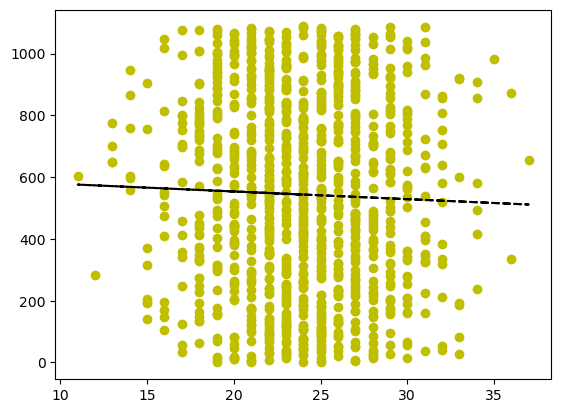

In [5]:
'''
using AI Trust Score to predict the number of customers who "like", 
or atleast, don't "dislike" AI Tools among retained customers.
'''

y = [i for i in range(len(df['ResponseId']))]
x = [int(i) for i in df['AI Trust Score']]

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

'''
Looking a the regression below, we can see a slight negative correlation.
We can conclude that as score increases number of customers goes down.
It is important to note that this large spread of scatter plots indicates
several linear regression assumption violations. 
There is a vague correlation.

The question now is, can I make it better or is this as good as it gets with my given question data?
'''

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

In [6]:
df.to_csv(r'regression_data.csv',header=True, sep=',')
df

,ResponseId,Q1,Q2,Q3,Q4,AI Trust Score
1,R_3VooXw7NssLHR3M,18-20,"$90,000 - $109,000",3,No,19
2,R_25DNldKcmHWRz2S,50-59,"$110,000 or more",2,Yes,24
3,R_4MzGq4JoJtuslyC,21-29,"$0 - $9,999",1,No,25
4,R_9GpPGvqSV460b4i,50-59,"$0 - $9,999",1,Yes,21
5,R_0c6ggIVQWPr6j5Q,40-49,"$0 - $9,999",2,No,25
...,...,...,...,...,...,...
1085,R_aVs4h1EKxlOQS1w,40-49,"$0 - $9,999",1,No,21
1086,R_6QJTxTsd5hFNnCu,21-29,"$110,000 or more",1,Yes,24
1087,R_56IgNKN7RK2g3f8,17 or younger,"$50,000 - $69,000",3,Yes,31
1088,R_6XyUSp5pkFK40ho,18-20,"$90,000 - $109,000",3,Yes,29
